<a href="https://colab.research.google.com/github/dayoungkimm/MS-AI-School/blob/main/AI_01_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리
## Scaling
## Sampling
## Dimensionality Reduction (차원의 축소)
## Categorical Variable to Numeric Variable


In [ ]:
import numpy as np
import pandas as pd
import sklearn                    #sci-kit 사이킷런
import matplotlib.pyplot as plt

import os
from os.path import join
import warnings
warnings.filterwarnings('ignore')

먼저, 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오기.

전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있다. 

데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠다.

In [ ]:
abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
  abalone_columns.append(l)
print(abalone_columns)

['Sex\n', 'Length\n', 'Diameter\n', 'Height\n', 'Whole weight\n', 'Shucked weight\n', 'Viscera weight\n', 'Shell weight\n', 'Rings']


In [ ]:
#\n 제거해주기
abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
  abalone_columns.append(l.strip())        #파일을 가져올때 끝에 \n 이 붙을 수 있음. 정리필요.(앞뒤 공백도 같이 제거됨)
print(abalone_columns)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


1. Pandas를 이용해서 abalone 데이터를 읽어 온다.

In [ ]:
#Pandas를 이용해서 abalone 데이터를 읽어 온다.
data = pd.read_csv(abalone_path)    #컬럼 헤더로 첫행 데이터를 잘못 인식하고 있음.
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data = pd.read_csv(abalone_path,header=None)    #컬럼 헤더 없는 행이라고 지정해주기.
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#abalone_columns 데이터 불러오기
data = pd.read_csv(abalone_path,header=None,names=abalone_columns)    
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# head(), shape 를 사용해서 데이터를 살펴 본다.
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.shape

(4177, 9)

In [ ]:
#특정 컬럼 삭제하기
label = data['Sex']
del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


2. Scaling

In [ ]:
#min-max 스케일링.
data2 = (data - np.min(data)) / (np.max(data)-np.min(data))
data2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [ ]:
# 1) 데이터 전처리 모듈의 불러오기 및 정의하기
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
mMscaler.fit(data)
data3 = mMscaler.transform(data)
data3

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [ ]:
#위의 식 간단히 정리하기.

mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)

In [ ]:
type(data4)

numpy.ndarray

In [ ]:
#판다스의 형태로 변환해서 표현.
mMscaled_data = pd.DataFrame(data4, columns = data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [ ]:
# 2. Standard Scaling>> 편차가 0을 기준으로 해서 발생된다 (평균 0, 표준편차1)
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()
sdscaled_data = sdscaler.fit_transform(data)

sdscaled_data = pd.DataFrame(sdscaled_data, columns = data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


3. Sampling

In [ ]:
# Sampling
# 1. Random Over, Under Sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [ ]:
# Over Sampling
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_Data = pd.DataFrame(oversampled_data, columns=data.columns)

In [ ]:
print('원본 데이터의 클래스 비율 \n{0}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과 \n{0}'.format(pd.get_dummies(oversampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64


In [ ]:
#Under Sampling
undersampled_data, undersampled_label = rus.fit_resample(data, label)
undersampled_Data = pd.DataFrame(undersampled_data, columns=data.columns)

In [ ]:
print('원본 데이터의 클래스 비율 \n{0}'.format(pd.get_dummies(label).sum()))
print('\nRandom Under 샘플링 결과 \n{0}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Under 샘플링 결과 
F    1307
I    1307
M    1307
dtype: int64


SMOTE

In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000)

In [ ]:
data

array([[-0.76127906,  1.18432961, -2.05276724, ..., -0.45512355,
         0.0607243 ,  0.61046271],
       [-0.55426269, -0.74324902, -0.28640935, ..., -1.33565106,
        -1.03028216,  0.9457313 ],
       [-0.24243823,  0.39071319,  0.32954984, ..., -0.00665216,
         0.80754875, -0.02172926],
       ...,
       [-1.52399585, -0.80853453,  0.82890994, ..., -1.15617825,
         0.92710031, -0.30602125],
       [ 1.66221254, -0.10815944,  0.50238005, ..., -0.27523551,
        -0.19675605, -0.89316342],
       [ 0.35235072,  0.58825803, -0.13069481, ..., -0.0969116 ,
         0.21121778, -0.63819918]])

In [ ]:
label

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
#make_classification 분류용 가상 데이터 형성하기.
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, 
                                  n_features=2, 
                                  n_informative=2,
                                  n_redundant=0,
                                  n_repeated=0,
                                  n_classes=3,
                                  n_clusters_per_class=1,
                                  weights=[0.05,0.15,0.8],
                                  class_sep=0.8,
                                  random_state=2019) 

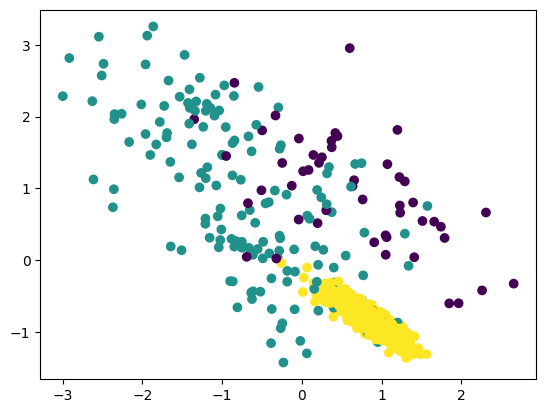

In [ ]:
#데이터 시각화하기.

fig = plt.Figure(figsize=(12,6))    #그림판 사이즈 만들기.
plt.scatter(data[:,0],data[:,1], c=label) #라벨에 따라 색이 다르게 찍힘.

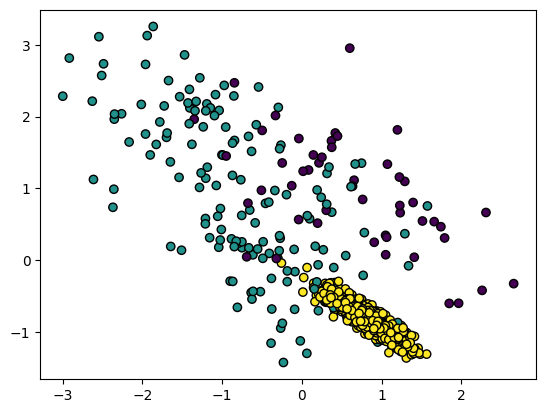

In [ ]:
fig = plt.Figure(figsize=(12,6))    
plt.scatter(data[:,0],data[:,1], c=label, linewidth=1,edgecolor='black')

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5) #이웃의 숫자 지정

In [ ]:
smoted_data, smoted_label=smote.fit_resample(data,label)

In [ ]:
print('원본 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(label).sum()))
print('Smoted 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율
0     53
1    154
2    793
dtype: int64
Smoted 데이터의 클래스 비율
0    793
1    793
2    793
dtype: int64


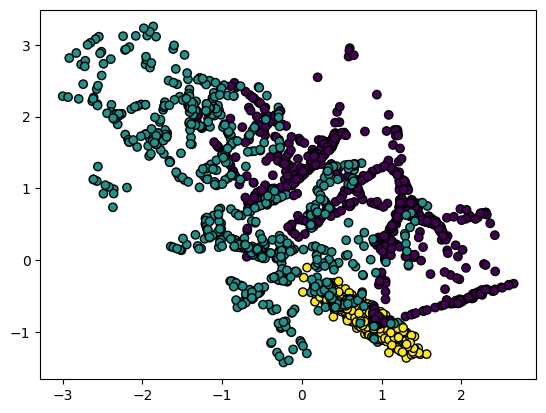

In [ ]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0], smoted_data[:,1],c=smoted_label,linewidth=1,edgecolor='black')
#빈자리에 값이 생성됨>>smote로 값이 증식됨

4. 차원의 축소

In [ ]:
# 차원의 축소

from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR) #description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
data = digits.data
label = digits.target

In [ ]:
print(data[0])
print(label[0])
#64차원

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [ ]:
#데이터의 형태를 reshape()을 사용해서 바꿀 수 있다. 
print(data[0].reshape((8,8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(data[0].reshape((8,-1))) #reshape(8,8)을 좀 더 쉽게 표현 /"-1"데이터를 여덟개씩 끊고 나머지는 알아서 정해줘.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


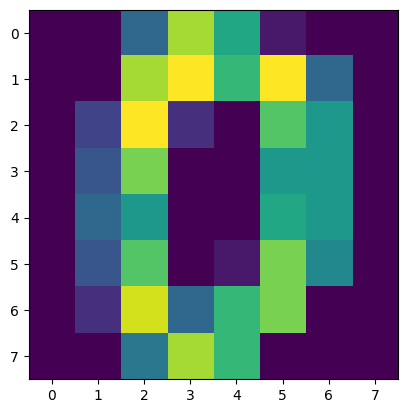

In [ ]:
#matplotlib 그림그려주는 식
plt.imshow(data[0].reshape((8,8)))

Label: 0


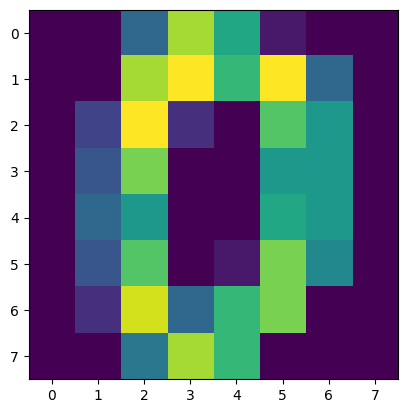

In [ ]:
plt.imshow(data[0].reshape((8,8)))
print('Label: {}'.format(label[0]))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #2차원으로!

In [ ]:
# 데이터에서 주 성분을 찾기
new_data = pca.fit_transform(data)

In [ ]:
# 결과 살펴보기
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA 데이터의 차원 
(1797, 2)


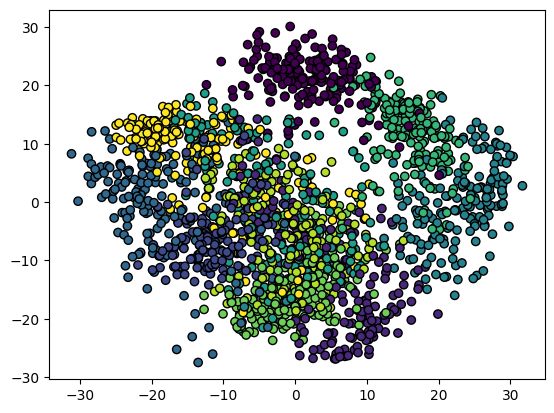

In [ ]:
plt.scatter(new_data[:,0],new_data[:,1],c=label, linewidth=1,edgecolor='black')

5. Encoding

In [ ]:
# Label Encoding

data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']
del data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

encoded_label = labelEncode.fit_transform(label)
encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [ ]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
#label.values.reshape((1,-1))) >> 1고정, -1 변화값/ 1 로우(가로)에 데이터 n개/ 한줄로 표현해줘
#label.values.reshape((-1,1)) >> 1고정, -1 변화값/  1 컬럼(세로)에 데이터 한개/ 한 줄에 1개씩 넣어서 만들어줘
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))

In [ ]:
one_hot_encoded

<4177x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4177 stored elements in Compressed Sparse Row format>

In [ ]:
columns = np.concatenate([np.array(['label']),ohe.categories_[0]]) #합치기
columns

array(['label', 'F', 'I', 'M'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(label.values.reshape((-1, 1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))

columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
print(columns)
result = pd.DataFrame(data = np.concatenate(
                      [label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], 
                      axis=1),columns=columns)
result.head(10)

['label' 'F' 'I' 'M']


,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0
